In [1]:
# Importing Libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast
from datasets import load_dataset


# Creating Dataframe

ds = load_dataset("lukebarousse/data_jobs")
df = ds['train'].to_pandas()

# Cleaning the DataFrame

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])   #converting job posted date to a datetime object
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # converting job skills to a list object

# Drop none values from column job_skills
# df.dropna(subset='job_skills',inplace=True)

c:\Users\amaib\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Filtering DataFrame based on a country 
country  = "United States"  # country variable
df_cn = df[df['job_country'] == country]

# Exploding the job_skills column which is currently a list
df_cn_expl = df_cn.explode('job_skills')


In [9]:
df_skill_count = df_cn_expl.groupby(['job_skills','job_title_short']).size()
df_skill_count = df_skill_count.reset_index(name='skill_count')

In [31]:
job_titles = df_skill_count['job_title_short'].value_counts().head(3)
job_titles = job_titles.reset_index(name='job_count')
job_titles = job_titles['job_title_short'].tolist()
job_titles = sorted(job_titles)
job_titles


['Data Analyst', 'Data Engineer', 'Data Scientist']

Creating a Dataframe to capture the number of jobs by job titles


In [33]:

df_job_title_count = df_cn['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


Merging DataFrames to ensure we have the percentage of jobs requiring that particular skill

In [34]:
df_skills_perc = pd.merge(df_skill_count,df_job_title_count,on='job_title_short',how='left')
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total
0,airflow,Business Analyst,38,7382
1,airflow,Cloud Engineer,27,423
2,airflow,Data Analyst,387,67816
3,airflow,Data Engineer,4716,35080
4,airflow,Data Scientist,1166,58830
...,...,...,...,...
1865,zoom,Machine Learning Engineer,5,921
1866,zoom,Senior Data Analyst,50,11791
1867,zoom,Senior Data Engineer,30,9289
1868,zoom,Senior Data Scientist,25,12946


Creating the new percentage column

In [38]:
df_skills_perc['skill_likelihood'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100
df_skills_perc.sort_values(by='skill_likelihood',ascending=False)

,job_skills,job_title_short,skill_count,jobs_total,skill_likelihood
1213,python,Senior Data Scientist,9816,12946,75.822648
1212,python,Senior Data Engineer,6692,9289,72.042200
1209,python,Data Scientist,42379,58830,72.036376
1526,sql,Senior Data Engineer,6651,9289,71.600818
1210,python,Machine Learning Engineer,644,921,69.923996
...,...,...,...,...,...
1235,qt,Data Analyst,1,67816,0.001475
84,asp.net core,Data Analyst,1,67816,0.001475
204,capacitor,Data Analyst,1,67816,0.001475
221,chainer,Data Analyst,1,67816,0.001475


In [41]:
df_skills_perc[df_skills_perc['job_title_short'] == "Data Analyst"].sort_values(by='skill_count',ascending=False).head(5)

,job_skills,job_title_short,skill_count,jobs_total,skill_likelihood
1521,sql,Data Analyst,34452,67816,50.802171
455,excel,Data Analyst,27519,67816,40.578919
1611,tableau,Data Analyst,19311,67816,28.475581
1207,python,Data Analyst,18382,67816,27.105698
1349,sas,Data Analyst,13200,67816,19.464433


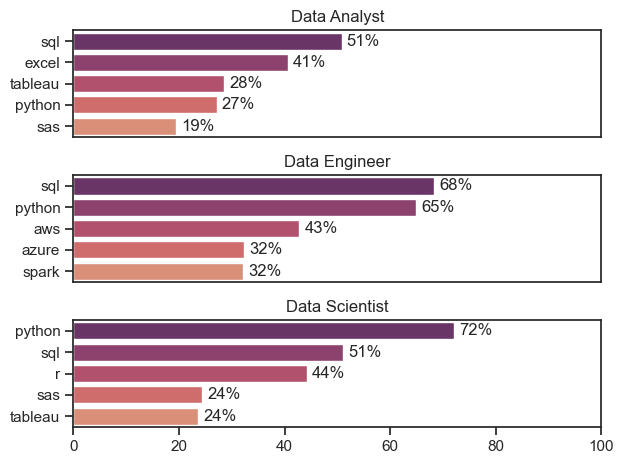

In [71]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == title].sort_values(by='skill_count',ascending=False).head(5)
    sns.barplot(data=df_plot,x='skill_likelihood',y='job_skills',ax=ax[i],hue='job_skills',palette='flare_r')
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set_title(title)
    ax[i].set_xlim(0,100)

    if i != len(job_titles) - 1:   # removing the ticks from the first two subplots
        ax[i].set_xticks([])

    for a, b in enumerate(df_plot['skill_likelihood']):  #adding text next to the bar plot for clarity
        ax[i].text(b+1,a,f'{b:.0f}%',va='center')
plt.tight_layout()